### Problem Statement :

Credit Card Frauds are the cases of using someone else's credit cards for financial transactions without the information of the card owner. Credit Cards were made available inorder for the people to increase their buying power, it is an agreement with your bank that lets the user use the money lended by the bank in exchange for the repayment of this lended money on the due date or incur interest charges. With the rise in the e-commerce and the recent boom of OTT platforms during the Coronavirus Pandemic, use of credit cards has risen exponentially along with other payment processes. As all the things in the nature are binary, cases of credit card frauds has also achieved high numbers. Global economy pays the price of more than $ 24 billion per year due to these frauds. Thus, it becomes essential to solve this problem and as a result a lot of startups have been born into this \$ 30 billion industry. Thus, building automated models for such a rising problem statement is necessary and AI - ML is the key for it!

So in this kernal our aim is to classify whether a transaction made is legit or fraud.
The data set is obtained from kaggle "Credit Card Fraud dataset "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud".

##### LETS START WITH IMPORTING NECESSARY LIBRARIES

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import os

#import warnings
import warnings as wr
wr.filterwarnings("ignore")

# Import preprocessing and composing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Import metrics tools
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Import fitting tools
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression

In [88]:
df= pd.read_csv("creditcard.csv")
df.head(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


## EDA 

In [89]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [90]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [91]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [92]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [93]:
list_cols=list(df.columns)
print(list_cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


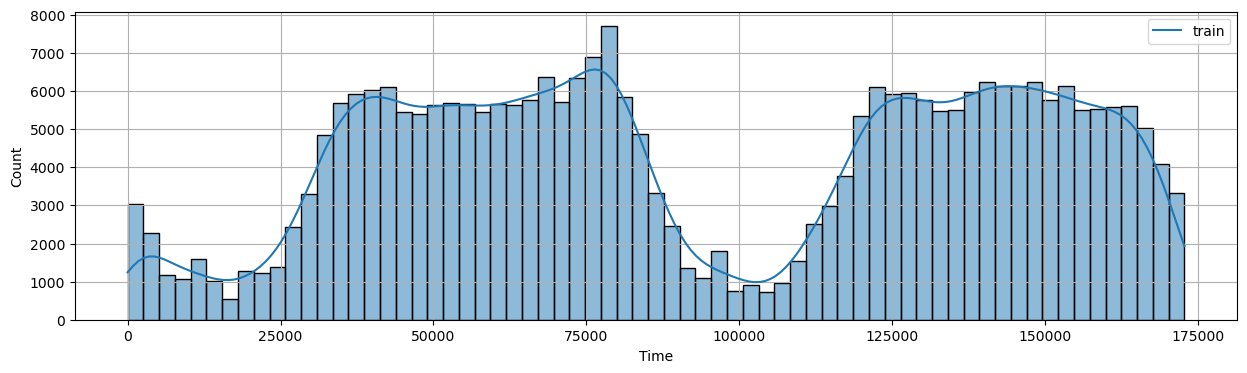

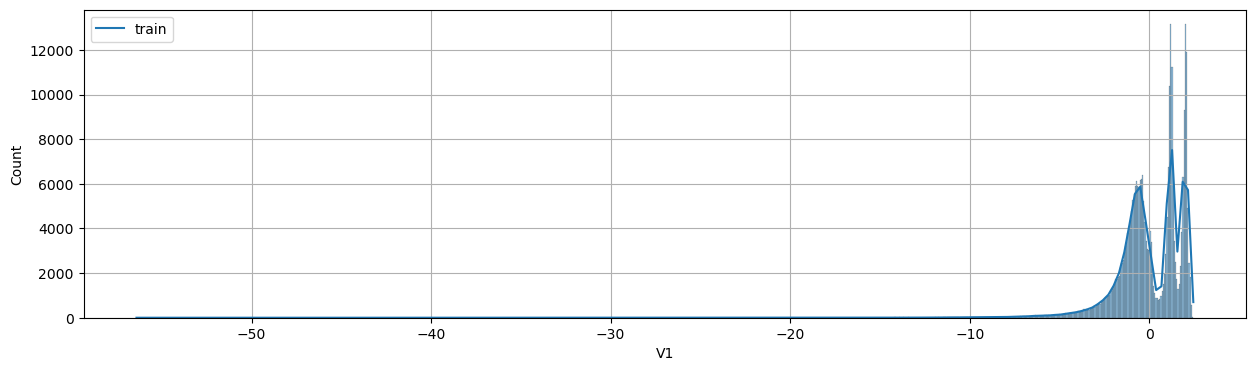

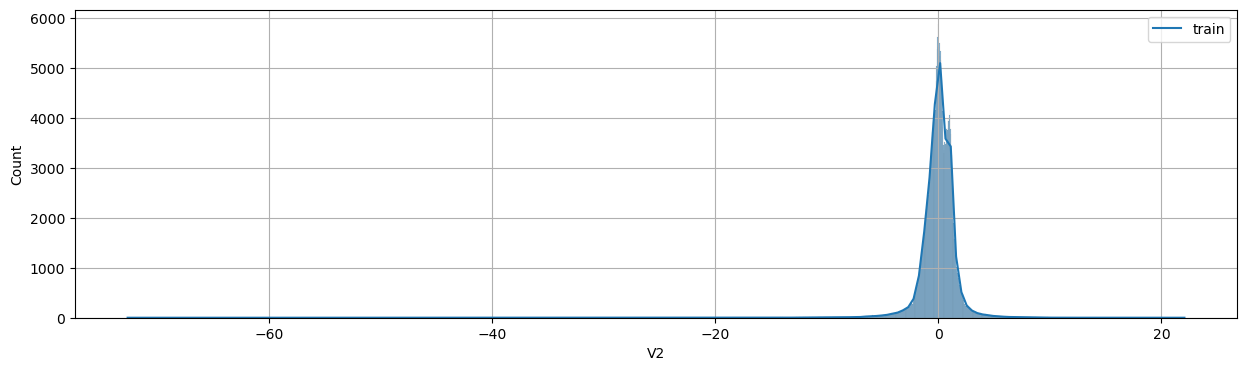

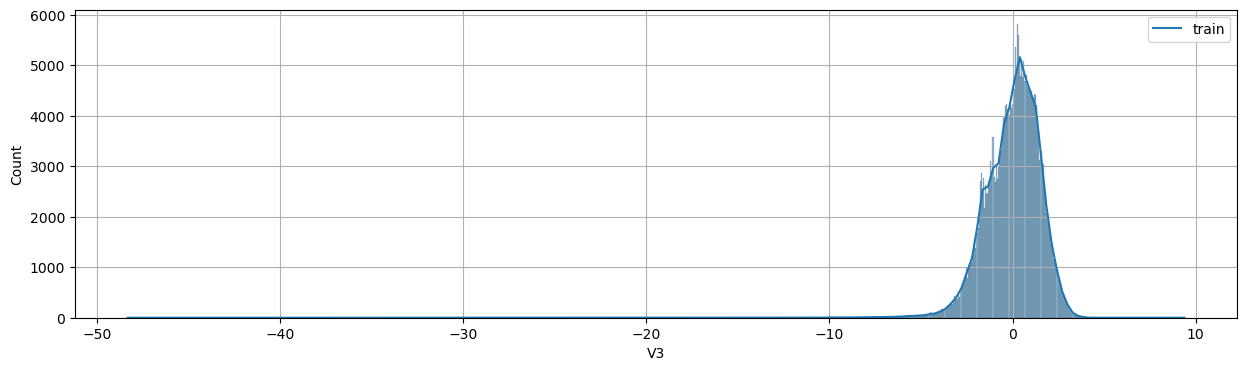

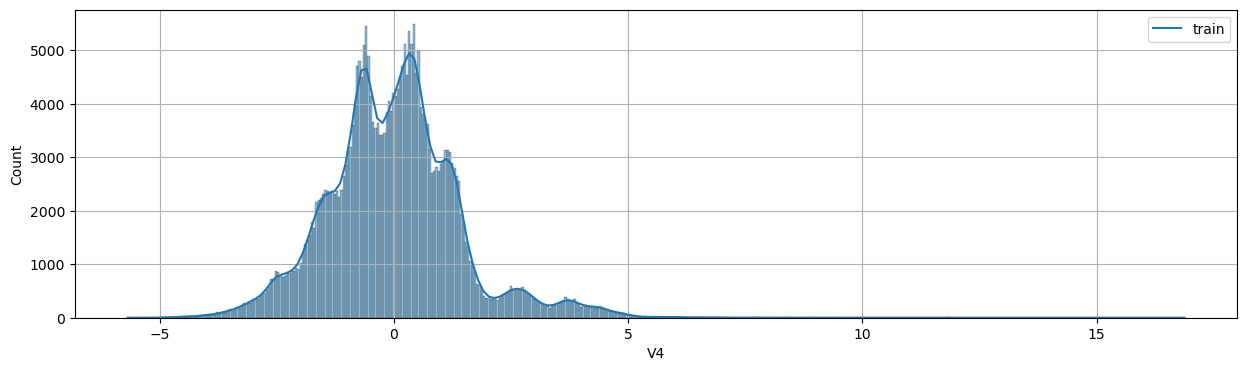

In [94]:
for i in list_cols[:5]:
    plt.figure(figsize=(15,4))
    plt.grid()
    sns.histplot(data= df, x= i, kde=True)
    plt.legend(['train'])



The features V1 TO v28 are obtained form PCA, so we except them to be normalized as we can see already in the above plots.

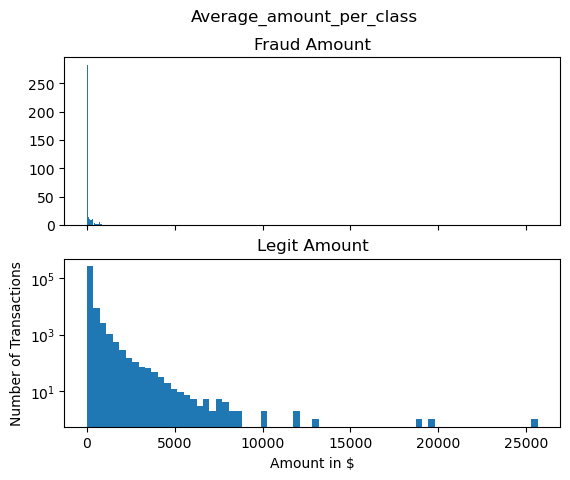

In [95]:
graph, (plot1, plot2) = plt.subplots(2,1, sharex= True)
graph.suptitle("Average_amount_per_class")
bins=70
plot1.hist(x=fraud["Amount"], bins= bins)
plot1.set_title("Fraud Amount")

plot2.hist(x=legit["Amount"], bins= bins)
plot2.set_title("Legit Amount")

plt.xlabel("Amount in $")
plt.ylabel("Number of Transactions")
plt.yscale("log")
plt.show()

<Figure size 640x480 with 0 Axes>

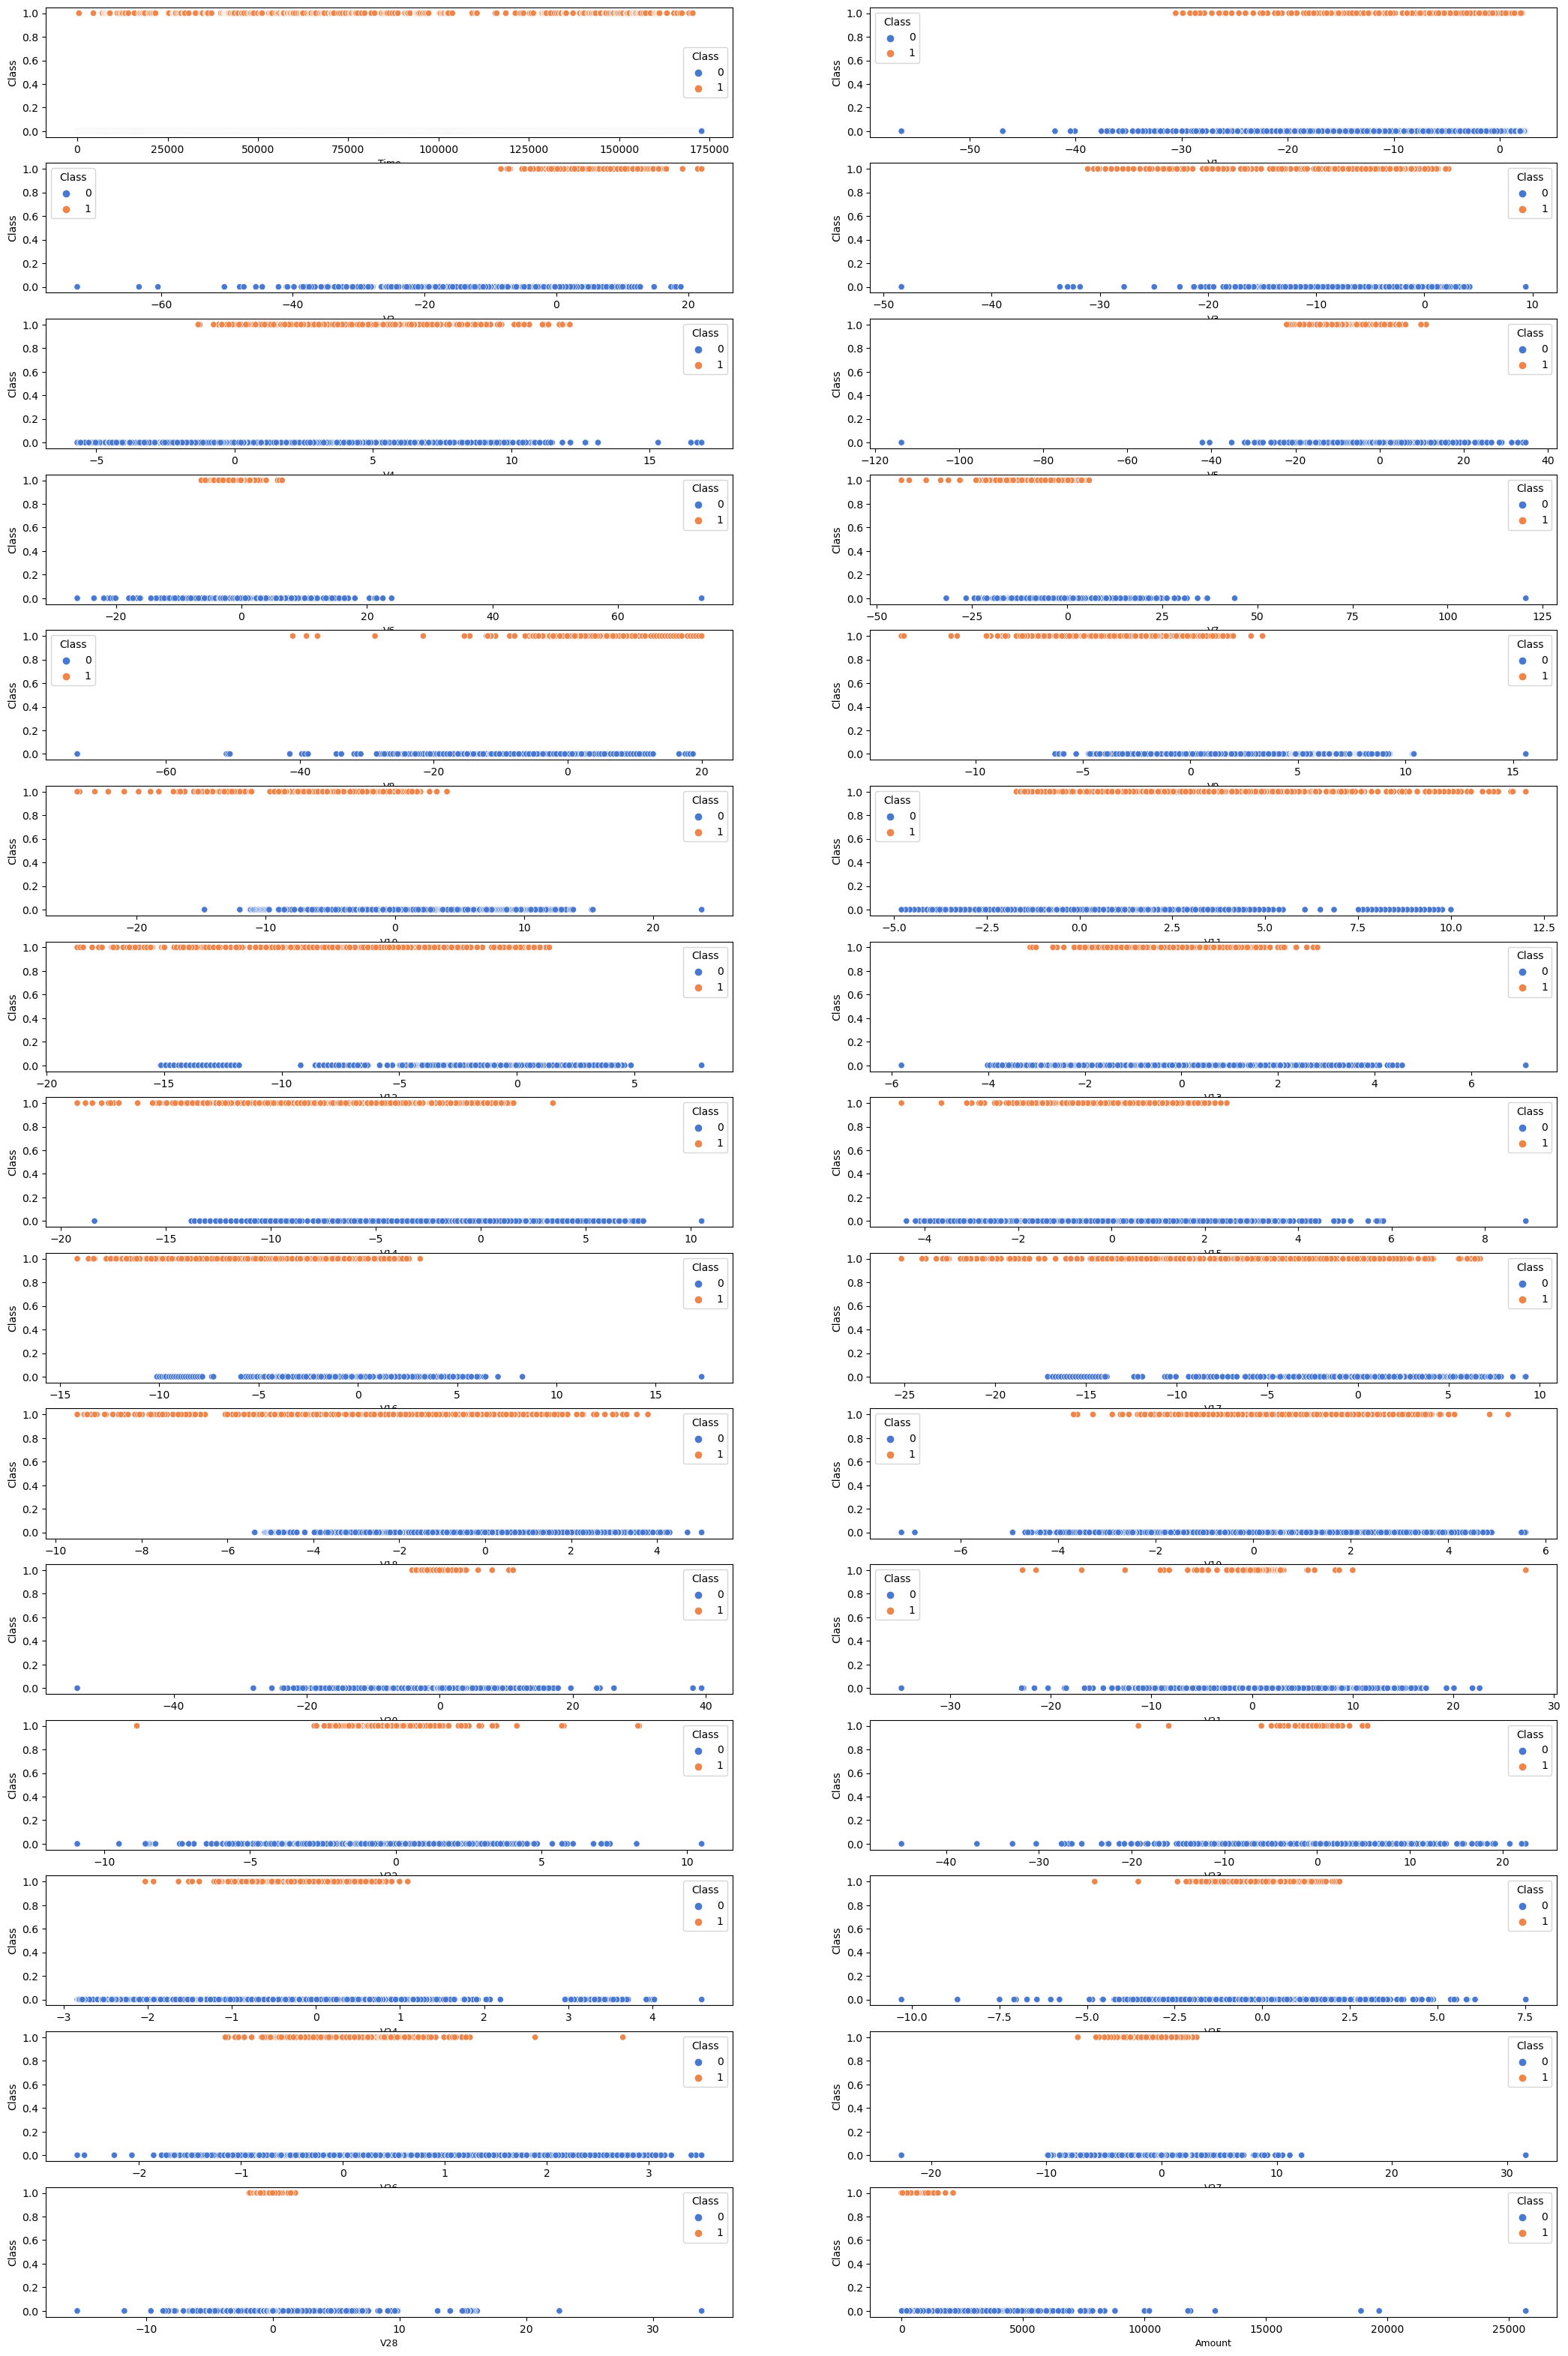

In [96]:

i = 1
plt.figure()
fig, ax = plt.subplots(15, 2, figsize=(26,40 ))
for feature in list_cols[:-1]:
    plt.subplot(15, 2, i)
    sns.scatterplot(x=feature, 
                    y=df['Class'], 
                    data=df, 
                    palette='muted', hue=df["Class"])
    plt.xlabel(feature, fontsize=9)
    
    i += 1

plt.show()

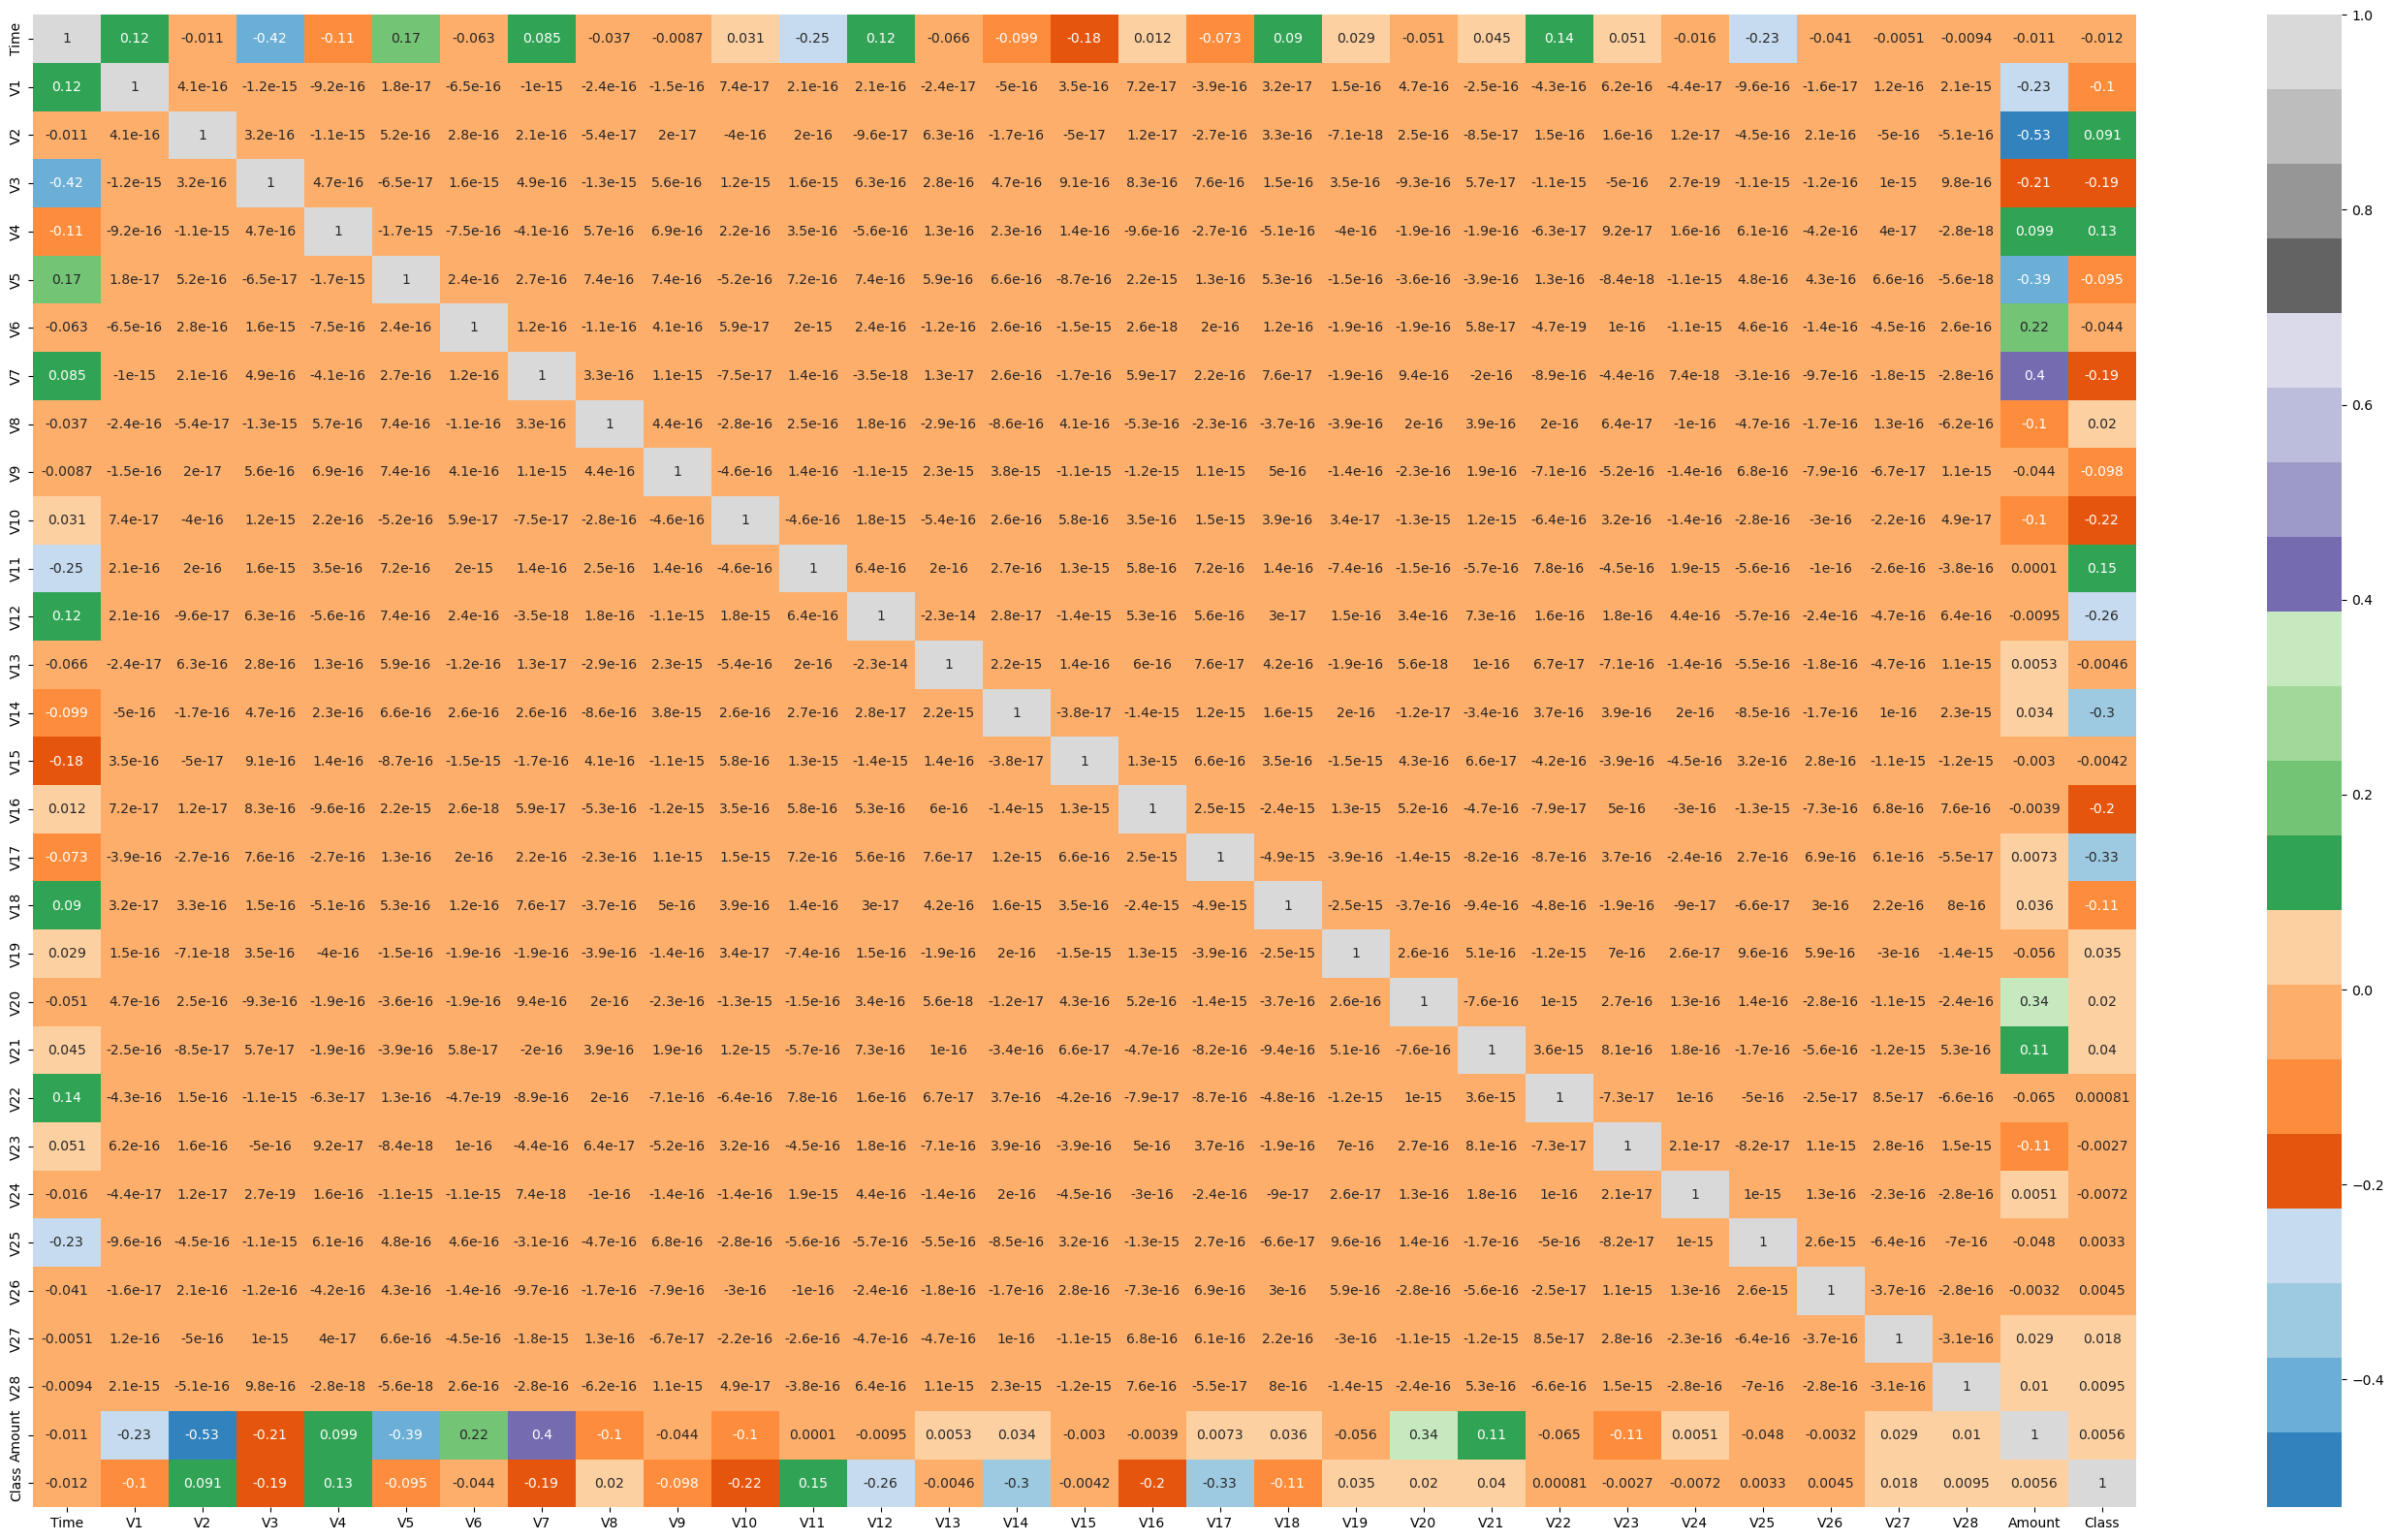

In [97]:
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True,cmap="tab20c")
plt.show()

In [98]:
#CONVERTING time of transaction from time difference b/w first transaction and the current transaction 
# to the hour of the day at which it took place 
def  convert_time(df):
    df["Time"]=df["Time"]/3600
    df["Time"]=df["Time"]%24
    df["Time"]=df["Time"].apply(np.ceil)

convert_time(fraud)
convert_time(legit)

(array([ 6., 10., 57., 17., 23., 11.,  9., 23.,  9., 16.,  8., 53., 17.,
        17., 23., 26., 22., 29., 33., 19., 18., 16.,  9., 21.]),
 array([ 1.        ,  1.95833333,  2.91666667,  3.875     ,  4.83333333,
         5.79166667,  6.75      ,  7.70833333,  8.66666667,  9.625     ,
        10.58333333, 11.54166667, 12.5       , 13.45833333, 14.41666667,
        15.375     , 16.33333333, 17.29166667, 18.25      , 19.20833333,
        20.16666667, 21.125     , 22.08333333, 23.04166667, 24.        ]),
 <BarContainer object of 24 artists>)

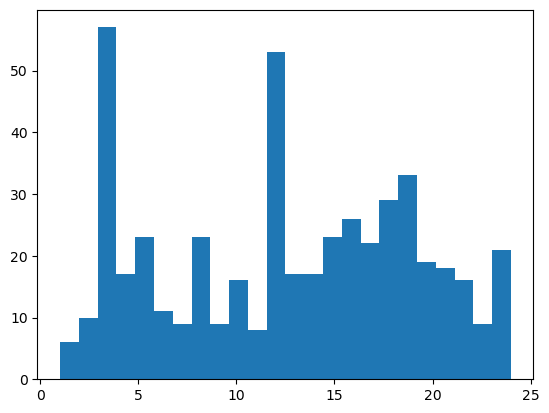

In [99]:
plt.hist(fraud["Time"], bins= 24)

(array([3.0000e+00, 7.6870e+03, 4.2120e+03, 3.2690e+03, 3.4760e+03,
        2.1850e+03, 2.9790e+03, 4.0930e+03, 7.2190e+03, 1.0266e+04,
        1.5824e+04, 1.6593e+04, 1.6804e+04, 1.5400e+04, 1.5350e+04,
        1.6545e+04, 1.6434e+04, 1.6435e+04, 1.6135e+04, 1.7003e+04,
        1.5632e+04, 1.6739e+04, 1.7692e+04, 2.6340e+04]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 24 artists>)

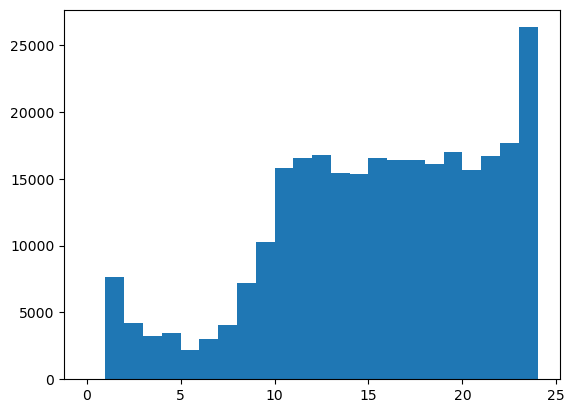

In [100]:
plt.hist(legit["Time"], bins= 24)

In [101]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [102]:
var = df[df.columns[1:]].corr()['Class'][:]
var.sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [130]:
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [131]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state = 2, sampling_strategy=0.1)
x_resample, y_resample = sm.fit_resample(X_train, y_train.ravel())
pd.Series(y_resample).value_counts()

0    199020
1     19902
dtype: int64

In [134]:
def tell_me_more(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(cm)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.show()
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.69      0.78       148

    accuracy                           1.00     85443
   macro avg       0.95      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

[[85284    11]
 [   46   102]]


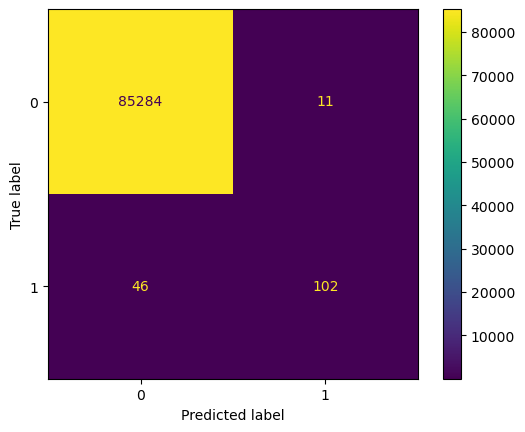

Now lets see wothout SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.61      0.87      0.72       148

    accuracy                           1.00     85443
   macro avg       0.80      0.94      0.86     85443
weighted avg       1.00      1.00      1.00     85443

[[85212    83]
 [   19   129]]


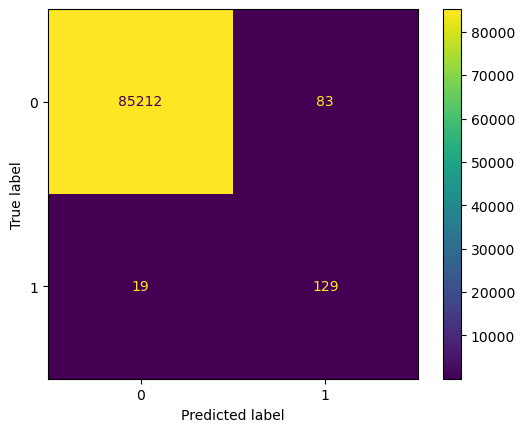

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.84      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

[[85286     9]
 [   24   124]]


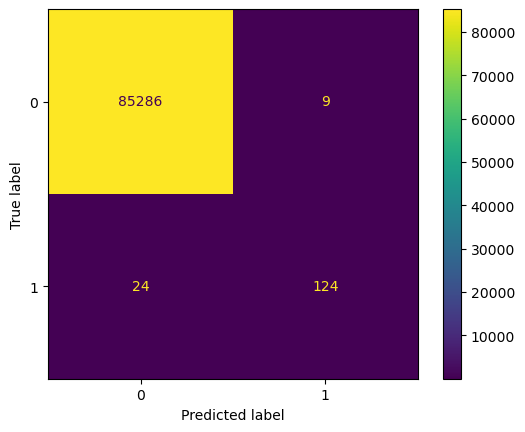

Now lets see wothout SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.86      0.87       148

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

[[85277    18]
 [   20   128]]


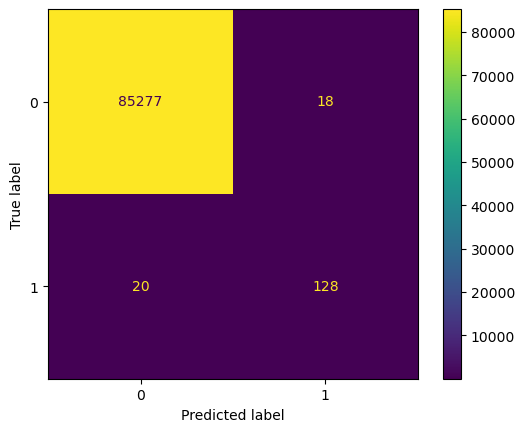

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.83      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

[[85286     9]
 [   25   123]]


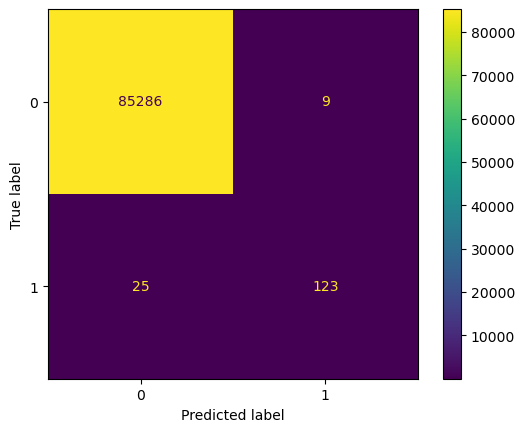

Now lets see wothout SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.86      0.88       148

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

[[85279    16]
 [   20   128]]


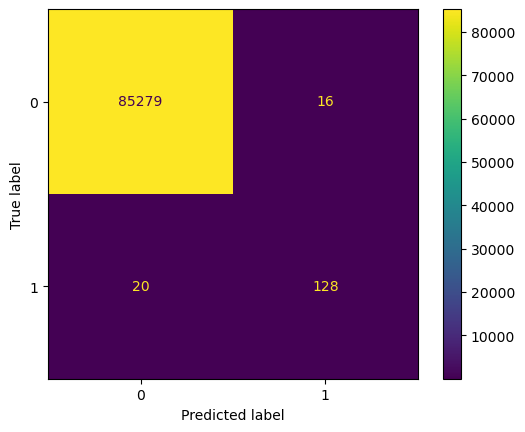

In [135]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

Pipelines =[]

pipeline_lr = Pipeline([('std_scaler', StandardScaler()), ('Logistic_Regression', LogisticRegression())])
pipeline_rf= Pipeline([('std_scaler', StandardScaler()), ('Random_Forest', RandomForestClassifier())])
pipeline_xgb= Pipeline([('std_scaler', StandardScaler()), ('XGB_classifier', XGBClassifier())])

Pipelines = [('pipeline_lr', pipeline_lr), ('pipeline_rf', pipeline_rf), ('pipeline_xgb', pipeline_xgb)]
#score= make_scorer(f1_score)


for name, pipeline in Pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    tell_me_more(y_test, y_pred)

    print("Now lets see wothout SMOTE")
    pipeline.fit(x_resample, y_resample)
    y_pred = pipeline.predict(X_test)
    tell_me_more(y_test, y_pred)


In [139]:
#Pipelines[2][1].named_steps

### HYPERPARAMETER TUNING

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.87      0.88       148

    accuracy                           1.00     85443
   macro avg       0.95      0.94      0.94     85443
weighted avg       1.00      1.00      1.00     85443

[[85280    15]
 [   19   129]]


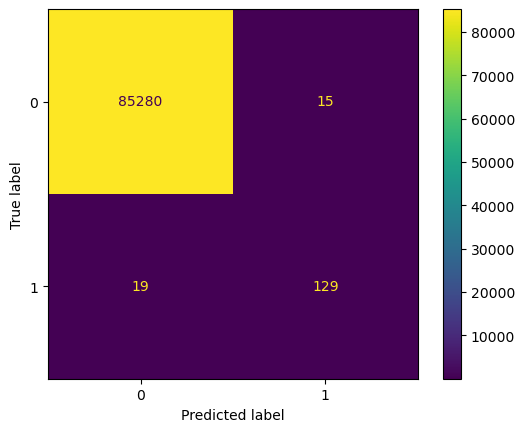

In [142]:
from sklearn.model_selection import GridSearchCV

classifier = XGBClassifier()
pipeline = make_pipeline(StandardScaler(), classifier)


# Set parameters values for grid
param_grid = {
    "xgbclassifier__learning_rate":[0.1, 0.3, 0.5],
    "xgbclassifier__n_estimators": [100, 200, 300],
    "xgbclassifier__max_depth": [4, 5],
    "xgbclassifier__objective": ["binary:logistic"],
    "xgbclassifier__use_label_encoder": [False],
    "xgbclassifier__booster": ["gbtree"],
    "xgbclassifier__eval_metric": ["logloss"]}

# Make custom scoring metric
scorer = make_scorer(f1_score)

# Intantiate GridSearchCV
grid_search_cv = GridSearchCV(pipeline, param_grid, scoring = scorer)

# Fit
model = grid_search_cv.fit(x_resample, y_resample)
gbdt_predictions = model.predict(X_test)
tell_me_more(y_test, gbdt_predictions)

In [143]:
model.best_params_

{'xgbclassifier__booster': 'gbtree',
 'xgbclassifier__eval_metric': 'logloss',
 'xgbclassifier__learning_rate': 0.5,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__n_estimators': 300,
 'xgbclassifier__objective': 'binary:logistic',
 'xgbclassifier__use_label_encoder': False}